<a href="https://colab.research.google.com/github/yuvaravii/BBC-News-article-Topic-Identification/blob/main/TF_IDF_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Description**

In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

In [ ]:
# for dataframes
import pandas as pd
import numpy as np
import re

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

import json
import glob
import os

#gensim
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel

import sklearn
import keras

#spacy
import spacy 
from nltk.corpus import stopwords

# for visualisation of data
import seaborn as sns
import matplotlib.pyplot as plt


## loading the data

In [ ]:
processed_data_filepath='/content/drive/MyDrive/Colab Notebooks/Capstone Project/BBC article/2. Cleaned and Preprocessed data/2nd_cleaned_dataset_stg.csv'
new_df=pd.read_csv(processed_data_filepath)
df=new_df.copy()
df.head()

In [ ]:
df.columns

We humans communication through language, which consist of words. How to convert those words into understandable format of computer as they understand only numericals.

There is way::

There are 2 techniques involved in conversion of words to numericals.


1.   **BoW** = Bag of words
2.   **TF- IDF** = Term frequency and inverse document frequency

We may think, why cant we just label the words with numbers. However if we think deeply computation of those word for eg. 200002020 is 'data' and 20202020229 is 'analytics', if we perform math with this range even the computer will blast.

In order to run smoothly we store in form of vectors. which means they are stored in a matrix space with specified direction.
Imagine arranging books in library. We can label and arrange in much efficient way than arranging them in series.

In statistician point of view, you can say that 'TF-IDF' is the measure of importance of the given word in the given corpus.








**Term frequency** - as the name suggests , frequency of term appearing in the corpus

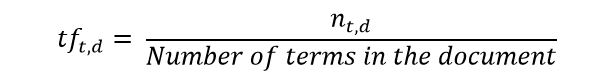

Here, **n** is number of time a word appear in a document

**Inverse Document frequency** - it gives the importance of words, as per the emperical formula, higher the frequency lower the importance, lower the frequency of occurence of term 't' higher the importance.

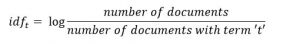

Through this method, rare words are given more importance also the words with higher frequency and higher importance are also notified.
Thus we can obtain the gist of it


## Term Document Frequency

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
df['cleaned_doc'][0]

In [ ]:
def tf(corpus):
    dic={}
    for document in corpus:
        for word in document.split():
            if word in dic:
                dic[word] = dic[word] + 1
            else:
                dic[word]=1
    for word,freq in dic.items():
        print(word,freq)
        dic[word]=freq/sum(map(len, (document.split() for document in corpus)))
    return dic 


############## WHILE USING THIS TRUNCATED VALUES EXCEEDING COMMENTS ARE INCLUDED , AS IT IS LOOKING IN WHOLE CORPUS ########
# MOVING TO TFIDF


In [ ]:
# importing the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# creating the model
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fitting the data into model
dataset=df['cleaned_doc']
tfIdf = tfIdfVectorizer.fit_transform(dataset)

# Creating a data frame using 
tf_idf_df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
tf_idf_df = tf_idf_df.sort_values('TF-IDF', ascending=False)
print (tf_idf_df.head(20))

In [ ]:
tf_idf_df=tf_idf_df.head(20)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=tf_idf_df.transpose(),orient='h')


sns.set(style="darkgrid")
sns.set_color_codes("muted")
ax.set_title(' The Most important words present inside the corpus after cleaning process',fontsize=20)


In [ ]:
###################################################### USING COUNT VECTORIZER & TFIDF TRANSFORMER ##################################

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

tfIdfTransformer = TfidfTransformer(use_idf=True)

dataset=df['docs']

countVectorizer = CountVectorizer()

wordCount = countVectorizer.fit_transform(dataset)

newTfIdf = tfIdfTransformer.fit_transform(wordCount)

untouched_df= pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
untouched_df = untouched_df.sort_values('TF-IDF', ascending=False)
print (untouched_df.head(25))

In [ ]:
tf_idf_df=untouched_df.head(20)

plt.figure(figsize=(15,8))
ax = sns.barplot(data=tf_idf_df.transpose(),orient='h')


sns.set(style="darkgrid")
sns.set_color_codes("muted")
ax.set_title(' The Most important words present inside the corpus in Raw dataset',fontsize=20)
